<h1 align="center"> Практична робота №7 </h1>
<h2 align="center"> <b> А/Б тестування </b> </h2>
<hr> <h3 align="center"> Виконав студент групи ФБ-35 Куб'юк Дмитро </h3>

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

df = pd.read_csv("winequality.csv", sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
2,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
4,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red


Крок 1. Сформулювати гіпотези <br>
H₀ = підвищення вмісту алкоголю не впливає на якість вина. <br>
H₁ = підвищення вмісту алкоголю збільшує якість вина.

Крок 2. Визначити метрики <br>
Основна метрика — середня якість (атрибут quality). <br>
Додаткові: середній вміст алкоголю (alcohol) та середня кислотність (volatile acidity).

Крок 3. Затвердити критерій успіху <br>
Тест вважається успішним, якщо різниця між групами є статистично значущою (α = 0.05) і середня якість у групі B перевищує групу A щонайменше на 0.2 бала.

Крок 4. Підготувати експеримент <br>
Група A — це "контрольна" група (вино з поточним вмістом алкоголю). <br>
Група B — це "експериментальна" група (вино, у якого ми збільшили alcohol на 5% — ніби в процесі виробництва підняли міцність).

In [47]:
sample_A = df.sample(200, random_state=228)

sample_B = sample_A.copy()
sample_B["alcohol"] = sample_B["alcohol"] * 1.05
sample_B["volatile acidity"] = sample_B["volatile acidity"] * 0.95

Крок 5. Запустити експеримент <br>


In [48]:
sample_B["quality"] = np.clip(sample_B["quality"] + np.random.choice([0, 1], size=len(sample_B), p=[0.7, 0.3]), 0, 10) # cимулюємо експериментальний вплив: у 30% випадків якість вина підвищується на 1 бал

Крок 6. Проаналізувати результати <br>

Середня якість A: 5.850
Середня якість B: 6.145
Різниця у якості: 0.295
p-value: 0.0020


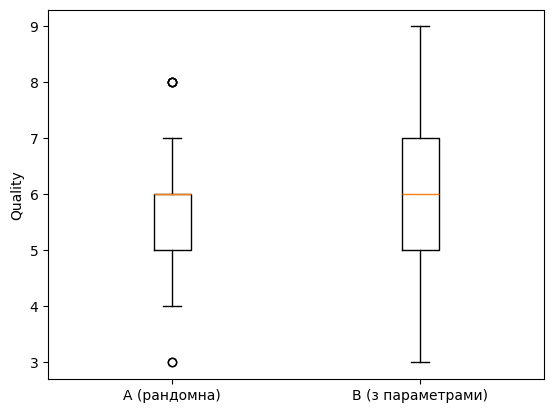

In [49]:
t_stat, p_value = ttest_ind(sample_B["quality"], sample_A["quality"], equal_var=False)
mean_quality_A = sample_A["quality"].mean()
mean_quality_B = sample_B["quality"].mean()

print(f"Середня якість A: {mean_quality_A:.3f}")
print(f"Середня якість B: {mean_quality_B:.3f}")
print(f"Різниця у якості: {mean_quality_B - mean_quality_A:.3f}")
print(f"p-value: {p_value:.4f}")

plt.boxplot([sample_A["quality"], sample_B["quality"]], tick_labels=["A (рандомна)", "B (з параметрами)"])
plt.ylabel("Quality")
plt.show()

Оскільки різниця в якості > 0.2 та p-value < 0.05 -> різниця між групами є статистично значущою, тому відхиляємо нульову гіпотезу і робимо висновок, що покращення якості вина є не випадковим. Отже, можна рекомендувати впровадження нової рецептури.